In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
import random
plt.style.use('fivethirtyeight')

# 데이터를 로드해서
# train이랑 test 데이터로 나눈다
# 밑에 cell 무시

In [20]:
#training_data = []
DATADIR = 'C:/Users/zzang/Desktop/archive/img/val/'
CATEGORIES = ['bed', 'chair', 'sofa', 'swivelchair', 'table']
def create_training_data():
    img_size = 32
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                # Noramlization
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(str(e))
                
create_training_data()

In [21]:
print(len(training_data))

4447


In [63]:
random.shuffle(training_data)

X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y).reshape((4447, 1))

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [ ]:
#Load the data
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [79]:
#Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [80]:
#Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (2979, 32, 32, 3)
y_train shape: (2979, 1)
x_test shape: (1468, 32, 32, 3)
y_test shape: (1468, 1)


In [47]:
#Take a look at the first image as an array
index = 10
x_train[index]

array([[[239, 253, 249],
        [233, 248, 254],
        [249, 254, 251],
        ...,
        [252, 255, 249],
        [252, 255, 249],
        [251, 254, 254]],

       [[238, 254, 246],
        [226, 233, 250],
        [250, 254, 255],
        ...,
        [255, 253, 255],
        [255, 253, 255],
        [254, 255, 252]],

       [[247, 255, 254],
        [240, 247, 254],
        [255, 254, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [252, 255, 255]],

       ...,

       [[253, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [252, 255, 254]],

       [[253, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [252, 255, 255]],

       [[251, 254, 254],
        [253, 255, 255],
        [253, 255, 255],
        ...,
        [253, 255, 255],
        [253, 255, 255],
        [250, 255, 255]]

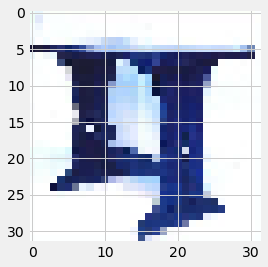

In [48]:
#Show the image as a picture
img = plt.imshow(x_train[index])

In [81]:
#Get the image label
print('The image label is:', y_train[index])

The image label is: [0]


In [83]:
#Get the image classification
#classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is:', CATEGORIES[y_train[index][0]])

The image class is: bed


In [84]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [85]:
#Print the new labels
print(y_train_one_hot)

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


In [86]:
#Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [1. 0. 0. 0. 0.]


In [87]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [56]:
x_train[index]

array([[[0.9372549 , 0.99215686, 0.97647059],
        [0.91372549, 0.97254902, 0.99607843],
        [0.97647059, 0.99607843, 0.98431373],
        ...,
        [0.98823529, 1.        , 0.97647059],
        [0.98823529, 1.        , 0.97647059],
        [0.98431373, 0.99607843, 0.99607843]],

       [[0.93333333, 0.99607843, 0.96470588],
        [0.88627451, 0.91372549, 0.98039216],
        [0.98039216, 0.99607843, 1.        ],
        ...,
        [1.        , 0.99215686, 1.        ],
        [1.        , 0.99215686, 1.        ],
        [0.99607843, 1.        , 0.98823529]],

       [[0.96862745, 1.        , 0.99607843],
        [0.94117647, 0.96862745, 0.99607843],
        [1.        , 0.99607843, 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.98823529, 1.        , 1.        ]],

       ...,

       [[0.99215686, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [91]:
#Create the models architecture
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5,5), activation = 'relu', input_shape=(32, 32, 3)) )

#Add a pooling layer
model.add( MaxPooling2D(pool_size = (2, 2)))

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation = 'relu') )

#Add another pooling layer
model.add( MaxPooling2D(pool_size = (2, 2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(5, activation='softmax'))

In [92]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [93]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.1)

Epoch 1/10
11/11 [==============================] - 0s 27ms/step - loss: 1.4997 - accuracy: 0.3338 - val_loss: 1.2442 - val_accuracy: 0.4664
Epoch 2/10
11/11 [==============================] - 2s 156ms/step - loss: 1.1780 - accuracy: 0.5390 - val_loss: 1.0918 - val_accuracy: 0.5973
Epoch 3/10
11/11 [==============================] - 0s 10ms/step - loss: 1.0218 - accuracy: 0.6143 - val_loss: 1.1722 - val_accuracy: 0.5671
Epoch 4/10
11/11 [==============================] - 0s 9ms/step - loss: 0.9411 - accuracy: 0.6468 - val_loss: 1.0102 - val_accuracy: 0.6208
Epoch 5/10
11/11 [==============================] - 1s 93ms/step - loss: 0.7991 - accuracy: 0.7061 - val_loss: 0.8435 - val_accuracy: 0.6644
Epoch 6/10
11/11 [==============================] - 1s 71ms/step - loss: 0.6971 - accuracy: 0.7467 - val_loss: 0.8344 - val_accuracy: 0.6678
Epoch 7/10
11/11 [==============================] - 0s 9ms/step - loss: 0.5974 - accuracy: 0.7844 - val_loss: 0.6562 - val_accuracy: 0.7685
Epoch 8/10
11/

In [94]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

46/46 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.8059


0.805858314037323

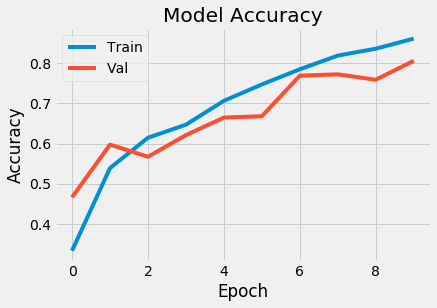

In [95]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

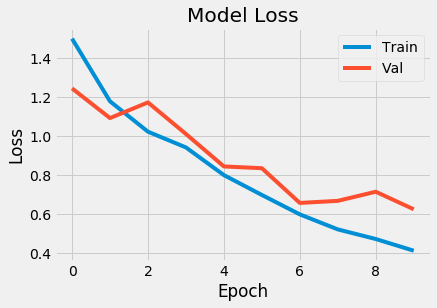

In [96]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [97]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

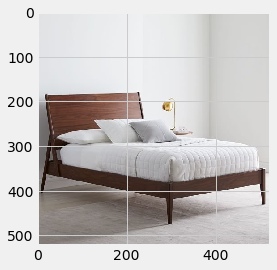

In [99]:
#Show the image
new_image = plt.imread('C:/Users/zzang/Desktop/bed.jpg')
img = plt.imshow(new_image)

C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


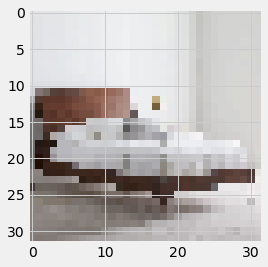

In [100]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

In [101]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[0.40562412, 0.00073206, 0.5874686 , 0.0052103 , 0.000965  ]],
      dtype=float32)

In [102]:
#Sort the predictions from least to greatest
list_index = [0, 1, 2, 3, 4]
x = predictions

for i in range(5):
    for j in range(5):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

#Show the sorted labels in order
print(list_index)

[2, 0, 3, 4, 1]


In [104]:
#Print the first 5 predictions
for i in range(5):
    print(CATEGORIES[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

sofa : 58.75 %
bed : 40.56 %
swivelchair : 0.52 %
table : 0.1 %
chair : 0.07 %
